<a href="https://www.kaggle.com/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=89716703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily WordCloud Visualization
#### Author: Concyclics

## Content
In this notebook, we are going to introduce jieba to split chinese words and introduce *wordcloud* to generate a visualization of news keyword like below.
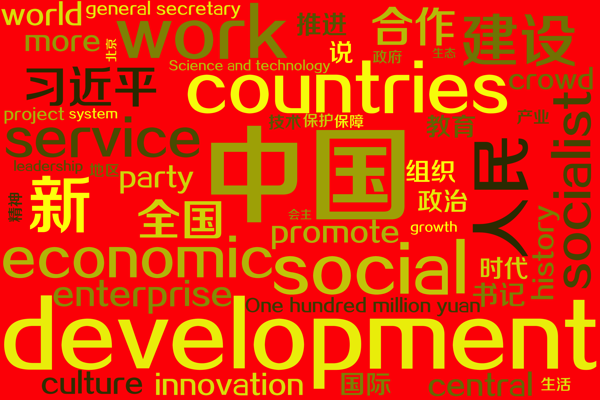

And also we will use *zhon* and some other method to clean the word data.

**Document of  WordCloud**

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

**basic parameters**

<dl class="field-list">
<dt class="field-odd">Parameters</dt>
<dd class="field-odd"><dl>
<dt><strong>font_path</strong><span class="classifier">string</span></dt><dd><p>Font path to the font that will be used (OTF or TTF).
Defaults to DroidSansMono path on a Linux machine. If you are on
another OS or don’t have this font, you need to adjust this path.</p>
</dd>
<dt><strong>width</strong><span class="classifier">int (default=400)</span></dt><dd><p>Width of the canvas.</p>
</dd>
<dt><strong>height</strong><span class="classifier">int (default=200)</span></dt><dd><p>Height of the canvas.</p>
</dd>
<dt><strong>prefer_horizontal</strong><span class="classifier">float (default=0.90)</span></dt><dd><p>The ratio of times to try horizontal fitting as opposed to vertical.
If prefer_horizontal &lt; 1, the algorithm will try rotating the word
if it doesn’t fit. (There is currently no built-in way to get only
vertical words.)</p>
</dd>
<dt><strong>mask</strong><span class="classifier">nd-array or None (default=None)</span></dt><dd><p>If not None, gives a binary mask on where to draw words. If mask is not
None, width and height will be ignored and the shape of mask will be
used instead. All white (#FF or #FFFFFF) entries will be considerd
“masked out” while other entries will be free to draw on. [This
changed in the most recent version!]</p>
</dd>
<dt><strong>contour_width: float (default=0)</strong></dt><dd><p>If mask is not None and contour_width &gt; 0, draw the mask contour.</p>
</dd>
<dt><strong>contour_color: color value (default=”black”)</strong></dt><dd><p>Mask contour color.</p>
</dd>
<dt><strong>scale</strong><span class="classifier">float (default=1)</span></dt><dd><p>Scaling between computation and drawing. For large word-cloud images,
using scale instead of larger canvas size is significantly faster, but
might lead to a coarser fit for the words.</p>
</dd>
<dt><strong>min_font_size</strong><span class="classifier">int (default=4)</span></dt><dd><p>Smallest font size to use. Will stop when there is no more room in this
size.</p>
</dd>
<dt><strong>font_step</strong><span class="classifier">int (default=1)</span></dt><dd><p>Step size for the font. font_step &gt; 1 might speed up computation but
give a worse fit.</p>
</dd>
<dt><strong>max_words</strong><span class="classifier">number (default=200)</span></dt><dd><p>The maximum number of words.</p>
</dd>
<dt><strong>stopwords</strong><span class="classifier">set of strings or None</span></dt><dd><p>The words that will be eliminated. If None, the build-in STOPWORDS
list will be used. Ignored if using generate_from_frequencies.</p>
</dd>
<dt><strong>background_color</strong><span class="classifier">color value (default=”black”)</span></dt><dd><p>Background color for the word cloud image.</p>
</dd>
<dt><strong>max_font_size</strong><span class="classifier">int or None (default=None)</span></dt><dd><p>Maximum font size for the largest word. If None, height of the image is
used.</p>
</dd>
<dt><strong>mode</strong><span class="classifier">string (default=”RGB”)</span></dt><dd><p>Transparent background will be generated when mode is “RGBA” and
background_color is None.</p>
</dd>
<dt><strong>relative_scaling</strong><span class="classifier">float (default=’auto’)</span></dt><dd><p>Importance of relative word frequencies for font-size.  With
relative_scaling=0, only word-ranks are considered.  With
relative_scaling=1, a word that is twice as frequent will have twice
the size.  If you want to consider the word frequencies and not only
their rank, relative_scaling around .5 often looks good.
If ‘auto’ it will be set to 0.5 unless repeat is true, in which
case it will be set to 0.</p>
</dd>
<dt><strong>color_func</strong><span class="classifier">callable, default=None</span></dt><dd><p>Callable with parameters word, font_size, position, orientation,
font_path, random_state that returns a PIL color for each word.
Overwrites “colormap”.
See colormap for specifying a matplotlib colormap instead.
To create a word cloud with a single color, use
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">"white"</span></code>.
The single color can also be specified using RGB code. For example
<code class="docutils literal notranslate"><span class="pre">color_func=lambda</span> <span class="pre">*args,</span> <span class="pre">**kwargs:</span> <span class="pre">(255,0,0)</span></code> sets color to red.</p>
</dd>
<dt><strong>regexp</strong><span class="classifier">string or None (optional)</span></dt><dd><p>Regular expression to split the input text into tokens in process_text.
If None is specified, <code class="docutils literal notranslate"><span class="pre">r"\w[\w']+"</span></code> is used. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>collocations</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to include collocations (bigrams) of two words. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>colormap</strong><span class="classifier">string or matplotlib colormap, default=”viridis”</span></dt><dd><p>Matplotlib colormap to randomly draw colors from for each word.
Ignored if “color_func” is specified.</p>
</dd>
<dt><strong>normalize_plurals</strong><span class="classifier">bool, default=True</span></dt><dd><p>Whether to remove trailing ‘s’ from words. If True and a word
appears with and without a trailing ‘s’, the one with trailing ‘s’
is removed and its counts are added to the version without
trailing ‘s’ – unless the word ends with ‘ss’. Ignored if using
generate_from_frequencies.</p>
</dd>
<dt><strong>repeat</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to repeat words and phrases until max_words or min_font_size
is reached.</p>
</dd>
<dt><strong>include_numbers</strong><span class="classifier">bool, default=False</span></dt><dd><p>Whether to include numbers as phrases or not.</p>
</dd>
<dt><strong>min_word_length</strong><span class="classifier">int, default=0</span></dt><dd><p>Minimum number of letters a word must have to be included.</p>
</dd>
<dt><strong>collocation_threshold: int, default=30</strong></dt><dd><p>Bigrams must have a Dunning likelihood collocation score greater than this
parameter to be counted as bigrams. Default of 30 is arbitrary.</p>
<p>See Manning, C.D., Manning, C.D. and Schütze, H., 1999. Foundations of
Statistical Natural Language Processing. MIT press, p. 162
<a class="reference external" href="https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22">https://nlp.stanford.edu/fsnlp/promo/colloc.pdf#page=22</a></p>
</dd>
</dl>
</dd>
</dl>

**basic methods**

<div class="wy-table-responsive"><table class="longtable docutils align-default">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">fit_words</span></code>(frequencies)</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_frequencies</span></code>(frequencies[,&nbsp;…])</p></td>
<td><p>Create a word_cloud from words and frequencies.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">generate_from_text</span></code>(text)</p></td>
<td><p>Generate wordcloud from text.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">process_text</span></code>(text)</p></td>
<td><p>Splits a long text into words, eliminates the stopwords.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">recolor</span></code>([random_state,&nbsp;color_func,&nbsp;colormap])</p></td>
<td><p>Recolor existing layout.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_array</span></code>()</p></td>
<td><p>Convert to numpy array.</p></td>
</tr>
<tr class="row-even"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_file</span></code>(filename)</p></td>
<td><p>Export to image file.</p></td>
</tr>
<tr class="row-odd"><td><p><code class="xref py py-obj docutils literal notranslate"><span class="pre">to_svg</span></code>([embed_font,&nbsp;optimize_embedded_font,&nbsp;…])</p></td>
<td><p>Export to SVG.</p></td>
</tr>
</tbody>
</table></div>

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  29541


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20210804-12-04.txt
阿沛·丹增晋美深情回忆父亲阿沛·阿旺晋美亲历的西藏和平解放细节——
“西藏必将迎来更加美好的明天”

　　“只有生活在祖国的大家庭当中，西藏才会发展进步，人民才会幸福安康。”这是亲身经历过新旧两个西藏的见证人阿沛·阿旺晋美常说的一句话。
　　阿沛·阿旺晋美1910年2月出生于西藏拉萨市，曾经担任西藏地方政府昌都粮官、民事法官、昌都总管、噶伦，是第三、四、五、六、七届全国人民代表大会常务委员会副委员长，中国人民政治协商会议第三、八、九、十、十一届全国委员会副主席。他的儿子阿沛·丹增晋美说：“我的父亲经常教导子女要把对国家的忠诚、对人民的热爱放在首位，父亲以身作则，始终站在国家和人民的立场上，与中国共产党肝胆相照、荣辱与共。”
　　1949年10月1日，中华人民共和国成立。解放西藏成为实现祖国大陆领土主权完整统一的关键一步，势在必行。但当时西藏地方政府上层少数分裂主义分子在帝国主义势力的挑唆、策动下，公然进行抗拒解放、分裂祖国的活动。“在这历史紧要关头，父亲提出，西藏问题是中国内部问题，只有同中央人民政府商谈才能解决，应当派代表团去北京谈判。他解散了昌都数千民兵，再次提出不能扩军备战。昌都地区解放时，他两次与其他官员联名给西藏地方政府写报告，劝说西藏地方政府尽快派代表同中央人民政府谈判，为促进西藏和平解放作了坚持不懈的努力。”阿沛·丹增晋美说。
　　1951年2月，阿沛·阿旺晋美作为西藏地方政府委派的首席全权代表，前往北京同中央人民政府进行和平谈判。1951年5月23日，经各方共同努力，最终签订了《中央人民政府和西藏地方政府关于和平解放西藏办法的协议》。
　　阿沛·丹增晋美说：“父亲多年后这样回顾了和平谈判、签订协议等场景：‘邓小平同志认真具体地解释中央对西藏的方针政策，对我们消除疑虑、增加和谈成功的信心起到了很重要的作用。在庆祝宴会上，毛泽东同志亲自接见了参加谈判的全体代表，问寒问暖，亲切交谈。’”
　　西藏和平解放后，阿沛·阿旺晋美坚决维护祖国统一和民族团结，积极投身西藏的各项改革和建设事业。1993年起，阿沛·阿旺晋美连续4届当选为全国政协副主席，在事关西藏发展稳定的重要问题上提出了自己的意见和建议，为推动我国民族工作以及民族区域自治制

### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 
三峡集团2020年主要经营指标实现稳增长
改革按下加速键 企业释放新活力（国企改革三年行动）

　　1118亿千瓦时！三峡电站2020年全年累计发电量，创造了单座水电站年发电量新的世界纪录。亮眼的成绩单不只是发电量。作为全球最大的水电开发企业和中国最大的清洁能源集团，中国长江三峡集团（以下简称“三峡集团”）2020年预计完成投资超过1760亿元、利润总额超过550亿元、净利润超过452亿元，分别同比增长约60%、26%、28%。
　　“三峡集团因改革而生、因创新而强，改革创新是三峡集团与生俱来的基因。”三峡集团党组书记、董事长雷鸣山说，“三峡集团坚决贯彻落实党中央、国务院关于国企改革三年行动的重大决策部署，进一步激发改革创新意识，努力在深化国有企业改革中发挥示范作用。主要经营指标实现高基数基础上的稳增长，充分展示了三峡集团近年来改革发展所取得的显著成果。”
　　三峡集团持续深化内部体制机制改革，为创建世界一流示范企业、实现清洁能源和长江生态环保“两翼齐飞”提供体制机制保障。以子企业董事会建设为重点，不断健全公司法人治理结构，形成了运转协调、有效制衡的治理机制。
　　近年来，三峡集团把混合所有制改革作为深化国企改革重要突破口。坚持“三因三宜三不”的原则，聚焦主业“多板块”上市目标，按照完善治理、强化激励、突出主业、提高效率的要求，成熟一家、推进一家，目前，三峡集团并表范围内混改企业占比约78%。针对国有企业“机关化”阻碍企业释放活力的问题，三峡集团从优化组织体系、精简审批事项、优化工作流程、改进文风会风、转变工作方式、打造高素质人才队伍等6个方面深入整改，持续优化集团管控，充分激发企业活力和效率。
　　“三峡集团积极参与市场竞争，破解发展瓶颈、厚植发展新优势。”三峡集团党组副书记、总经理王琳说，“在实施国企改革三年行动过程中，我们主动加压，按下了改革的‘加速键’，实现良好开局。”
　　对照国企改革三年行动方案50条任务，三峡集团逐条、逐项分解，明确了时间表、路线图，制定了工作任务台账，具有明确时间节点的标志性改革成果超过90项。
　　高质量完成“规定动作”。2020年上半年，三峡集团推动国企改革“双百行动”试点企业率先完成经理层成员任期制和契约化管理试点。在试点经验基础上，2020年下半年完成13家重要子企业经理层任期制和契约化管理工作。


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.383 seconds.
Prefix dict has been built successfully.


三峡/集团/2020/年/主要/经营/指标/实现/稳/增长/
/改革/按下/加速/键/ /企业/释放/新/活力/（/国企改革/三年/行动/）/
/
/　/　/1118/亿千瓦时/！/三峡/电站/2020/年/全年/累计/发电量/，/创造/了/单座/水电站/年发电量/新/的/世界纪录/。/亮眼/的/成绩单/不/只是/发电量/。/作为/全球/最大/的/水电/开发/企业/和/中国/最大/的/清洁/能源/集团/，/中国/长江三峡/集团/（/以下/简称/“/三峡/集团/”/）/2020/年/预计/完成/投资/超过/1760/亿元/、/利润总额/超过/550/亿元/、/净利润/超过/452/亿元/，/分别/同比/增长/约/60%/、/26%/、/28%/。/
/　/　/“/三峡/集团/因/改革/而生/、/因/创新/而强/，/改革/创新/是/三峡/集团/与生俱来/的/基因/。/”/三峡/集团/党组书记/、/董事长/雷鸣/山说/，/“/三峡/集团/坚决/贯彻落实/党中央/、/国务院/关于/国企改革/三年/行动/的/重大/决策/部署/，/进一步/激发/改革/创新/意识/，/努力/在/深化/国有企业/改革/中/发挥/示范作用/。/主要/经营/指标/实现/高/基数/基础/上/的/稳/增长/，/充分/展示/了/三峡/集团/近年来/改革/发展/所/取得/的/显著/成果/。/”/
/　/　/三峡/集团/持续/深化/内部/体制/机制/改革/，/为/创建/世界/一流/示范/企业/、/实现/清洁/能源/和/长江/生态/环保/“/两翼/齐飞/”/提供/体制/机制/保障/。/以子/企业/董事会/建设/为/重点/，/不断/健全/公司法人/治理/结构/，/形成/了/运转/协调/、/有效/制衡/的/治理/机制/。/
/　/　/近年来/，/三峡/集团/把/混合/所有制/改革/作为/深化/国企改革/重要/突破口/。/坚持/“/三因/三宜/三/不/”/的/原则/，/聚焦/主业/“/多/板块/”/上市/目标/，/按照/完善/治理/、/强化/激励/、/突出/主业/、/提高效率/的/要求/，/成熟/一家/、/推进/一家/，/目前/，/三峡/集团/并表/范围/内/混改/企业/占/比约/78%/。/针对/国有企业/“/机关化/”/阻碍/企业/释放/活力/的/问题/，/三峡/集团/从/优化/组织/体系/、/精简/审批/事项/、

The search mode best fits what we want. It split each possible keywords.

### 1.4 remove space, number and punctuations

#### 1.4.1 remove punctuation before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 385 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=9a5ae4c4cdb8665d31d46dff6cd21da8215450b46d8da2efc8ab88077275bb4a
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removePunctuation(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)


中共中央关于授予“七一勋章”的决定
（2021年6月29日）
　　今年是中国共产党成立100周年。100年来，我们党团结带领中国人民进行了艰苦卓绝的斗争，为实现民族独立、人民解放和国家富强、人民幸福接续奋斗，中华民族迎来了从站起来、富起来到强起来的伟大飞跃，创造了中华民族发展史、人类社会进步史上的伟大奇迹。党的十八大以来，以习近平同志为核心的党中央坚持以人民为中心，统筹推进“五位一体”总体布局、协调推进“四个全面”战略布局，脱贫攻坚战取得全面胜利，全面建成小康社会取得伟大历史性成就，开启了全面建设社会主义现代化国家的新征程。
　　在100年波澜壮阔的历史进程中，一代又一代中国共产党人顽强拼搏、不懈奋斗，涌现了一大批英勇牺牲的革命烈士、一大批矢志进取的英雄人物、一大批忘我奉献的先进模范。为了隆重表彰在中国革命、建设、改革各个历史时期，为党和人民事业一辈子孜孜以求、默默奉献，贡献突出、品德高尚的功勋模范党员，激励全党坚守初心使命、忠诚干净担当，党中央决定，授予马毛姐、王书茂、王占山、王兰花、艾爱国、石光银、吕其明、廷·巴特尔、刘贵今、孙景坤、买买提江·吾买尔、李宏塔、吴天一、辛育龄、张桂梅、陆元九、陈红军、林丹、卓嘎、周永开、柴云振、郭瑞祥、黄大发、黄文秀、黄宝妹、崔道植、蓝天野、魏德友、瞿独伊同志“七一勋章”。
　　这次受表彰的“七一勋章”获得者，是我们党各个时期、各条战线党员的杰出代表。他们信念坚定，对党忠诚，矢志不渝为党和人民事业奉献一切；他们践行宗旨，为了人民根本利益和美好生活，呕心沥血，拼搏奋战；他们勤勉务实，不论在什么岗位，都忘我工作、奋发有为，成就非凡功绩；他们不怕牺牲，保持革命者大无畏的战斗精神，危难时刻挺身而出，用生命践行使命，赢得全党全社会广泛赞誉。
　　当前，我国正处于实现中华民族伟大复兴的关键时期。党中央号召，全党要以习近平新时代中国特色社会主义思想为指导，以“七一勋章”获得者为榜样，增强“四个意识”、坚定“四个自信”、做到“两个维护”，更加紧密地团结在以习近平同志为核心的党中央周围，赓续共产党人的精神血脉，不忘初心、牢记使命，永不懈怠、一往无前，为全面建设社会主义现代化国家、实现第二个百年奋斗目标、实现中华民族伟大复兴的中国梦作出新的更大贡献！（“七一勋章”获得者简要事迹、照片见第十版）
　　（新华社北京6月29日电）



In [7]:
print(removePunctuation(news))

中共中央关于授予七一勋章的决定年月日今年是中国共产党成立周年年来我们党团结带领中国人民进行了艰苦卓绝的斗争为实现民族独立人民解放和国家富强人民幸福接续奋斗中华民族迎来了从站起来富起来到强起来的伟大飞跃创造了中华民族发展史人类社会进步史上的伟大奇迹党的十八大以来以习近平同志为核心的党中央坚持以人民为中心统筹推进五位一体总体布局协调推进四个全面战略布局脱贫攻坚战取得全面胜利全面建成小康社会取得伟大历史性成就开启了全面建设社会主义现代化国家的新征程在年波澜壮阔的历史进程中一代又一代中国共产党人顽强拼搏不懈奋斗涌现了一大批英勇牺牲的革命烈士一大批矢志进取的英雄人物一大批忘我奉献的先进模范为了隆重表彰在中国革命建设改革各个历史时期为党和人民事业一辈子孜孜以求默默奉献贡献突出品德高尚的功勋模范党员激励全党坚守初心使命忠诚干净担当党中央决定授予马毛姐王书茂王占山王兰花艾爱国石光银吕其明廷巴特尔刘贵今孙景坤买买提江吾买尔李宏塔吴天一辛育龄张桂梅陆元九陈红军林丹卓嘎周永开柴云振郭瑞祥黄大发黄文秀黄宝妹崔道植蓝天野魏德友瞿独伊同志七一勋章这次受表彰的七一勋章获得者是我们党各个时期各条战线党员的杰出代表他们信念坚定对党忠诚矢志不渝为党和人民事业奉献一切他们践行宗旨为了人民根本利益和美好生活呕心沥血拼搏奋战他们勤勉务实不论在什么岗位都忘我工作奋发有为成就非凡功绩他们不怕牺牲保持革命者大无畏的战斗精神危难时刻挺身而出用生命践行使命赢得全党全社会广泛赞誉当前我国正处于实现中华民族伟大复兴的关键时期党中央号召全党要以习近平新时代中国特色社会主义思想为指导以七一勋章获得者为榜样增强四个意识坚定四个自信做到两个维护更加紧密地团结在以习近平同志为核心的党中央周围赓续共产党人的精神血脉不忘初心牢记使命永不懈怠一往无前为全面建设社会主义现代化国家实现第二个百年奋斗目标实现中华民族伟大复兴的中国梦作出新的更大贡献七一勋章获得者简要事迹照片见第十版新华社北京月日电


In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removePunctuation(news))))


/中共/中央/中共中央/关于/授予/“/七一/勋章/”/的/决定/
/（/2021/年/6/月/29/日/）/
/　/　/今年/是/中国/国共/共产/共产党/中国共产党/成立/100/周年/。/100/年来/，/我们/党/团结/带领/中国/人民/进行/了/艰苦/卓绝/艰苦卓绝/的/斗争/，/为/实现/民族/独立/、/人民/解放/和/国家/富强/、/人民/幸福/接续/奋斗/，/中华/民族/中华民族/迎来/了/从/站/起来/、/富/起来/到/强/起来/的/伟大/飞跃/，/创造/了/中华/民族/中华民族/发展/发展史/、/人类/社会/进步/史上/的/伟大/奇迹/。/党/的/十八/大/以来/，/以/习近平/同志/为/核心/的/中央/党中央/坚持/以/人民/为/中心/，/统筹/推进/“/五位/一体/五位一体/”/总体/布局/总体布局/、/协调/推进/“/四个/全面/”/战略/布局/，/脱贫/攻坚/攻坚战/取得/全面/胜利/，/全面/建成/小康/社会/小康社会/取得/伟大/历史/历史性/成就/，/开启/了/全面/建设/社会/会主/主义/社会主义/现代/现代化/国家/的/新/征程/。/
/　/　/在/100/年/波澜/壮阔/波澜壮阔/的/历史/进程/历史进程/中/，/一代/又/一代/中国/国共/共产/共产党/中国共产党/人/顽强/拼搏/顽强拼搏/、/不懈/奋斗/，/涌现/了/一大/大批/一大批/英勇/牺牲/的/革命/烈士/革命烈士/、/一大/大批/一大批/矢志/进取/的/英雄/人物/英雄人物/、/一大/大批/一大批/忘我/奉献/的/先进/模范/。/为了/隆重/表彰/在/中国/革命/、/建设/、/改革/各个/历史/时期/，/为/人民/党和人民/事业/一辈/辈子/一辈子/孜孜/以求/孜孜以求/、/默默/奉献/，/贡献/突出/、/品德/德高/高尚/品德高尚/的/功勋/模范/党员/，/激励/全党/坚守/初/心/使命/、/忠诚/干净/担当/，/中央/党中央/决定/，/授予/马毛姐/、/王书茂/、/王占山/、/王/兰花/、/艾/爱国/、/石光/银/、/吕其明/、/廷/·/巴特/特尔/巴特尔/、/刘贵/今/、/孙景坤/、/买买/买买提/江/·/吾/买尔/、/李宏塔/、/吴/天一/、/育龄/辛育龄/、/张桂梅/、/陆元九/、/陈/红军/、/林丹/、/卓嘎/、/周永开/、/柴云振/、/郭瑞祥/、

#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasPunctuation(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasPunctuation(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))


/中共/中央/中共中央/关于/授予/“/七一/勋章/”/的/决定/
/（/2021/年/6/月/29/日/）/
/　/　/今年/是/中国/国共/共产/共产党/中国共产党/成立/100/周年/。/100/年来/，/我们/党/团结/带领/中国/人民/进行/了/艰苦/卓绝/艰苦卓绝/的/斗争/，/为/实现/民族/独立/、/人民/解放/和/国家/富强/、/人民/幸福/接续/奋斗/，/中华/民族/中华民族/迎来/了/从/站/起来/、/富/起来/到/强/起来/的/伟大/飞跃/，/创造/了/中华/民族/中华民族/发展/发展史/、/人类/社会/进步/史上/的/伟大/奇迹/。/党/的/十八/大/以来/，/以/习近平/同志/为/核心/的/中央/党中央/坚持/以/人民/为/中心/，/统筹/推进/“/五位/一体/五位一体/”/总体/布局/总体布局/、/协调/推进/“/四个/全面/”/战略/布局/，/脱贫/攻坚/攻坚战/取得/全面/胜利/，/全面/建成/小康/社会/小康社会/取得/伟大/历史/历史性/成就/，/开启/了/全面/建设/社会/会主/主义/社会主义/现代/现代化/国家/的/新/征程/。/
/　/　/在/100/年/波澜/壮阔/波澜壮阔/的/历史/进程/历史进程/中/，/一代/又/一代/中国/国共/共产/共产党/中国共产党/人/顽强/拼搏/顽强拼搏/、/不懈/奋斗/，/涌现/了/一大/大批/一大批/英勇/牺牲/的/革命/烈士/革命烈士/、/一大/大批/一大批/矢志/进取/的/英雄/人物/英雄人物/、/一大/大批/一大批/忘我/奉献/的/先进/模范/。/为了/隆重/表彰/在/中国/革命/、/建设/、/改革/各个/历史/时期/，/为/人民/党和人民/事业/一辈/辈子/一辈子/孜孜/以求/孜孜以求/、/默默/奉献/，/贡献/突出/、/品德/德高/高尚/品德高尚/的/功勋/模范/党员/，/激励/全党/坚守/初/心/使命/、/忠诚/干净/担当/，/中央/党中央/决定/，/授予/马毛姐/、/王书茂/、/王占山/、/王/兰花/、/艾/爱国/、/石光/银/、/吕其明/、/廷/·/巴特/特尔/巴特尔/、/刘贵/今/、/孙景坤/、/买买/买买提/江/·/吾/买尔/、/李宏塔/、/吴/天一/、/育龄/辛育龄/、/张桂梅/、/陆元九/、/陈/红军/、/林丹/、/卓嘎/、/周永开/、/柴云振/、/郭瑞祥/、

### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasPunctuation(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=10000):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 8570083


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 167134


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
围绕,2115
群众,11282
关注,1503
领域,6969
快速,1433
...,...
近水处,1
满布,1
高水期,1
鲟,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,310613
和,92645
在,73509
了,63922
,61174
中国,59881
发展,57949
是,45636
为,38890
等,32399


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-03-10 03:35:22--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  79.3KB/s    in 0.2s    

2022-03-10 03:35:23 (79.3 KB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 165829


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
中国,59881
发展,57949
人民,31688
新,29986
社会,29023
国家,28602
建设,28186
工作,26604
经济,20978
书记,20535


### 2.3 create wordcloud

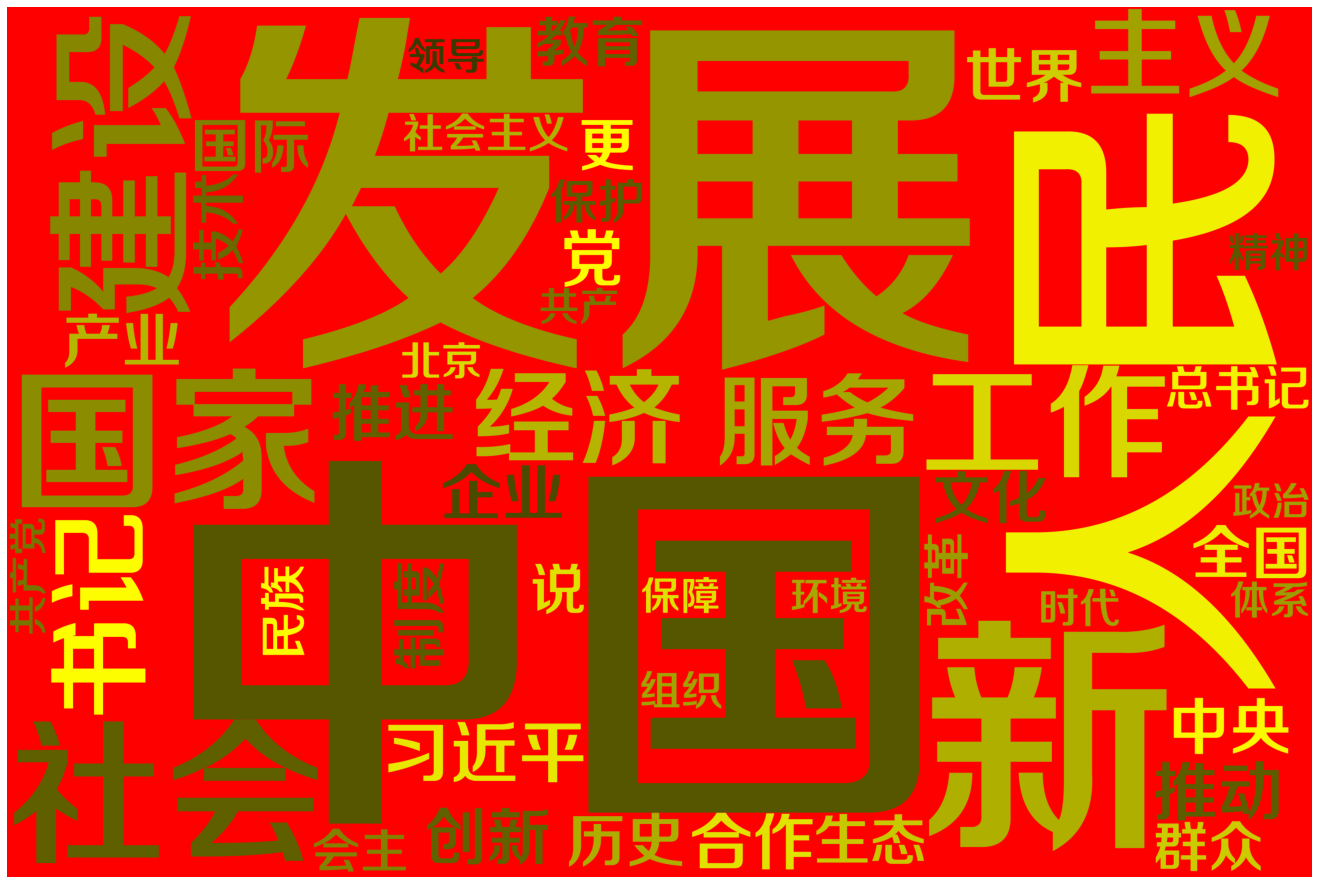

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud Zh.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English with YouDao API

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
China,59881
development,57949
people's,31688
new,29986
social,29023
countries,28602
construction,28186
work,26604
economic,20978
secretary,20535


### 2.5 create English WordCloud

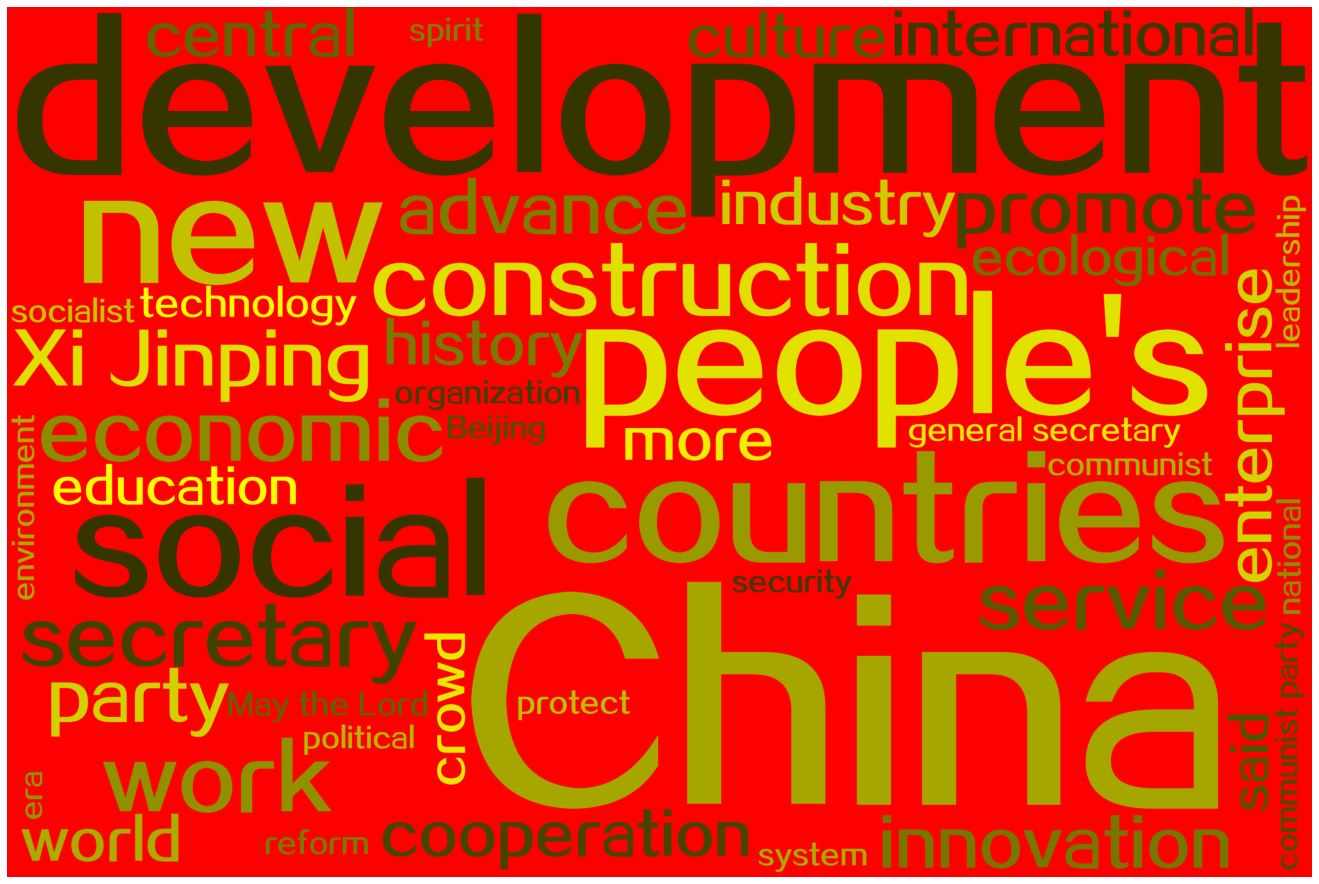

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
China,59881
发展,57949
people's,31688
新,29986
social,29023
countries,28602
construction,28186
work,26604
economic,20978
书记,20535


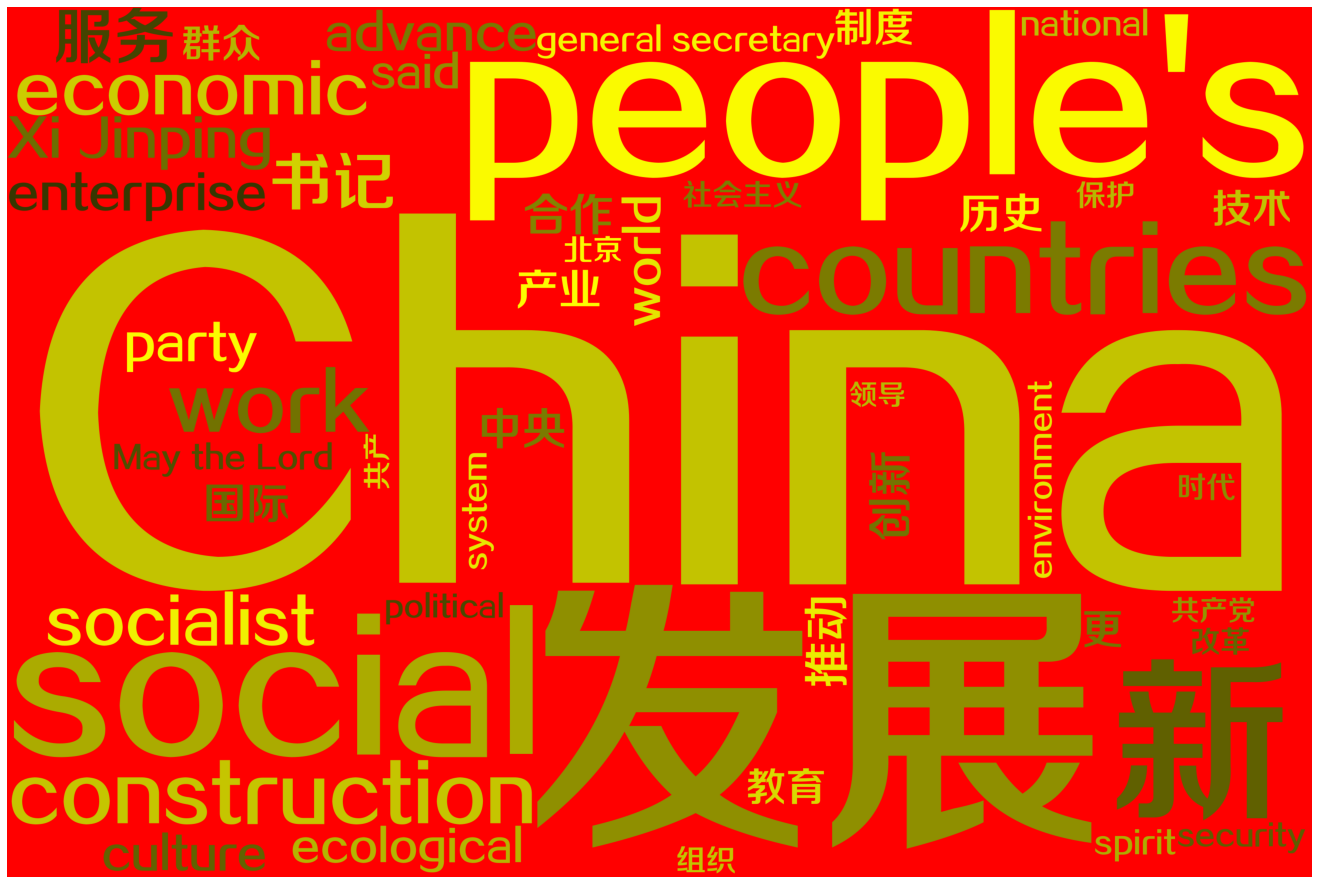

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Both Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Both Zh and En.png"))
plt.axis("off")
plt.show()